EXERCISE 1 - HOMEWORK 2

1) 2) 3) As first step we write two procedures to sample from given distribution: 
- Accept/Reject;
- Fast Tower Sampling.

Fundamental role here is played by variables: 
- N_item: number of item (bin) of our ditribution;
- N_point = number of extraction we want to perform in order to compare our results with theoretical expectation.



UNIFORM DISTRIBUTION

Here we recompute everything using the uniform ditribution betweem (0,1), the same uniform sampling used for thw whole code.

In [56]:
import math 
import random
import matplotlib.pyplot as plt
import time
import collections

print("UNIFORM DISTRIBUTION OF PROBABILITIES BETWEEN 0 AND 1.")

# We create here the theoretical distribution.

N_item = 5
norm = 0

list_random = []
list_prob = []

for i in range(N_item):
    
    r_i =random.random()
    list_random.append(r_i)
    norm += r_i
    
list_prob = [x / norm for x in list_random]
height = max(list_prob)
   
list_cumulants = [0]
cumul= 0

for i in range(N_item):
    cumul += N_item*list_prob[i]
    list_cumulants.append(cumul)


UNIFORM DISTRIBUTION OF PROBABILITIES BETWEEN 0 AND 1.


In [57]:
# Here it's the code for the two sampling procedures.

# FUNCTION FOR THE WHOLE CODE

#---------------------------------------------------#

# Accept reject method 1.
 

def accept_reject(h, N_ite, list_of_prob):
    xi = int(N_ite*random.random()) 
    y = h*random.random()
    
    
    if list_of_prob[xi] < y:
        return accept_reject(h, N_ite, list_of_prob)
    return xi


   #Tower sampling 2.
    
# BIG PROBLEM: the computational time is EXTREMELY DIPENDENT on how you define the function,
# here the tower sampling doesn't compute the cumulants distributions, which actually is
# extremely important for the success of the code. We compute it outside to have computational 
# time comparable with a normal dychotomic algorithm!

def tower_sampling(N_ite, list_of_prob, list_of_cumulants):
        
    i_min=0
    i_max=N_ite
    i= int((i_max-i_min)/2)
    x = N_ite*random.random()
    xi = i
    inc = 1
    
    while inc > 0.5:
        
        if list_of_cumulants[i] < x:
            i_min = i
            inc = (i_max-i_min)/2.
            i = math.ceil(i + inc)
            xi = i 
            
        else: 
            i_max = i
            xi = i 
            inc = (i_max-i_min)/2.
            i = math.floor(i - inc)
            
    return xi


#---------------------------------------------------#


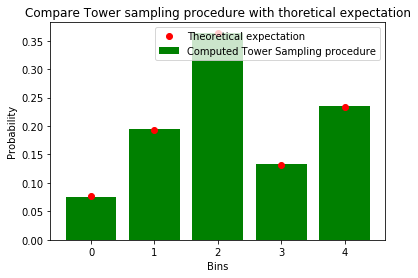

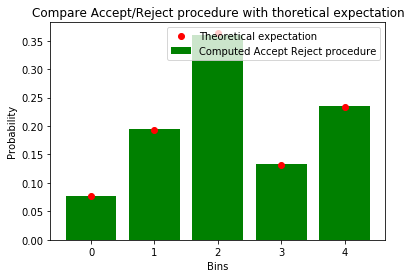

In [58]:
# Here is the code to plot histograms to compare the theoretical distribution
# with our results.

N_point = 100000
d_tower = []
d_accept = []
list_prob_plot = []
x_hist = []
for i in range(N_point):
    d_tower.insert(i, tower_sampling(N_item, list_prob, list_cumulants) - 1)
    d_accept.insert(i, accept_reject(height,N_item, list_prob))

#X Axes vector    
for i in range(N_item):
    x_hist.append(i)
    
# To plot accept/reject.
d_accept.sort()
counter_accept=collections.Counter(d_accept)
counter_accept_val = counter_accept.values()
counter_accept_val = [x / N_point for x in counter_accept_val]

# To plot tower.
d_tower.sort()
counter_tower=collections.Counter(d_tower)
counter_tower_val = counter_tower.values()
counter_tower_val = [x / N_point for x in counter_tower_val]

# To compare Tower Sampling with theoretical 

plt.bar(x_hist, counter_tower_val, color='green', label='Computed Tower Sampling procedure')
plt.plot(list_prob, 'ro', label='Theoretical expectation')
plt.title('Compare Tower sampling procedure with thoretical expectation')
plt.xlabel('Bins')
plt.ylabel('Probability')
plt.legend()
plt.show()

# To compare Accept/Reject with theoretical 

plt.bar(x_hist, counter_accept_val, color='green', label='Computed Accept Reject procedure')
plt.plot(list_prob, 'ro',  label='Theoretical expectation')
plt.title('Compare Accept/Reject procedure with thoretical expectation')
plt.xlabel('Bins')
plt.ylabel('Probability')
plt.legend()
plt.show()


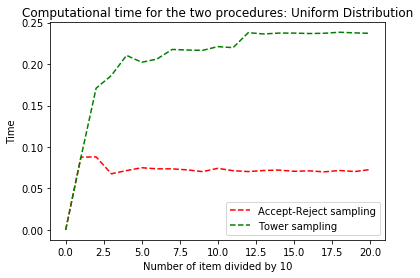

In [63]:
# Calculating computational time for both method. 
# The user can choose the number of loops.
# The user can choose the maximum number of items.

N_loop = 100000
N_item_max = 2000
N_ite = [0]
time_start_accept = []
time_start_tower = []
time_elapsed_accept = []
time_elapsed_tower = []
list_prob_time = []
list_random_time = []
list_cumulants_time = [0]
cumul_time= 0

for N_item_time in range(5,N_item_max, 100): 
    N_ite.append(N_item_max)
    
    for i in range(N_item_time):
        r_i = random.random() # UNIFORM DISTRIBUTION
        list_random_time.insert(i, r_i)
        norm += r_i

    
    list_prob_time = [x / norm for x in list_random_time]
    height_time = max(list_prob_time)

    for i in range(N_item_time):
        cumul_time += N_item*list_prob_time[i]
        list_cumulants_time.append(cumul_time)
    
    time_start_accept.append(time.clock())
    
    for i in range(N_loop):

        accept_reject(height_time, N_item_time, list_prob_time)

    time_elapsed_accept.append((time.clock() - time_start_accept[int((N_item_time - 5)/100)]))


    time_start_tower.append(time.clock())


    for i in range(N_loop):

        tower_sampling(N_item_time, list_prob_time, list_cumulants_time)

    time_elapsed_tower.append((time.clock() - time_start_tower[int((N_item_time - 5)/100)]))

    
plt.plot( time_elapsed_accept2, 'r--', label='Accept-Reject sampling' )
plt.plot( time_elapsed_tower2, 'g--', label='Tower sampling' )
plt.title('Computational time for the two procedures: Uniform Distribution')
plt.xlabel('Number of item divided by 10')
plt.ylabel('Time')
plt.legend()
plt.show()

#############################
#########################################


EXPONENTIAL DISTRIBUTION

Here we recompute everything using the exponential ditribution, obtained with the method of the inverse distribution.


In [64]:

print("EXPONENTIAL DISTRIBUTION OF PROBABILITIES BETWEEN 0 AND 1.")

# We create here the theoretical distribution.

N_item = 5
norm = 0

list_random = []
list_prob = []

for i in range(N_item):
    
    r_i =-math.log(random.random())
    list_random.append(r_i)
    norm += r_i
    
list_prob = [x / norm for x in list_random]
height = max(list_prob)
   
list_cumulants = [0]
cumul= 0

for i in range(N_item):
    cumul += N_item*list_prob[i]
    list_cumulants.append(cumul)


EXPONENTIAL DISTRIBUTION OF PROBABILITIES BETWEEN 0 AND 1.


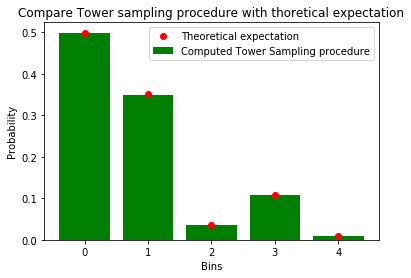

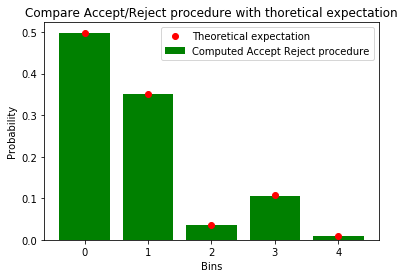

In [65]:
# Here is the code to plot histograms to compare the theoretical distribution
# with our results.

N_point = 100000
d_tower = []
d_accept = []
list_prob_plot = []
x_hist = []
for i in range(N_point):
    d_tower.insert(i, tower_sampling(N_item, list_prob, list_cumulants) - 1)
    d_accept.insert(i, accept_reject(height,N_item, list_prob))

#X Axes vector    
for i in range(N_item):
    x_hist.append(i)
    
# To plot accept/reject.
d_accept.sort()
counter_accept=collections.Counter(d_accept)
counter_accept_val = counter_accept.values()
counter_accept_val = [x / N_point for x in counter_accept_val]

# To plot tower.
d_tower.sort()
counter_tower=collections.Counter(d_tower)
counter_tower_val = counter_tower.values()
counter_tower_val = [x / N_point for x in counter_tower_val]

# To compare Tower Sampling with theoretical 

plt.bar(x_hist, counter_tower_val, color='green', label='Computed Tower Sampling procedure')
plt.plot(list_prob, 'ro', label='Theoretical expectation')
plt.title('Compare Tower sampling procedure with thoretical expectation')
plt.xlabel('Bins')
plt.ylabel('Probability')
plt.legend()
plt.show()

# To compare Accept/Reject with theoretical

plt.bar(x_hist, counter_accept_val, color='green', label='Computed Accept Reject procedure')
plt.plot(list_prob, 'ro',  label='Theoretical expectation')
plt.title('Compare Accept/Reject procedure with thoretical expectation')
plt.xlabel('Bins')
plt.ylabel('Probability')
plt.legend()
plt.show()


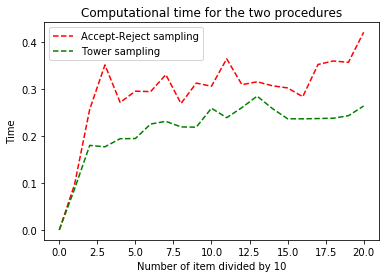

In [66]:
# Calculating computational time for both method. 
# The user can choose the number of loops.
# The user can choose the maximum number of items.

N_loop = 100000
N_item_max = 2000
N_ite = [0]
time_start_accept2 = []
time_start_tower2 = []
time_elapsed_accept2 = [0]
time_elapsed_tower2 = [0]
list_prob_time = []
list_random_time = []
list_cumulants_time = [0]
cumul_time= 0

for N_item_time in range(5,N_item_max, 100): 
    N_ite.append(N_item_max)
    
    for i in range(N_item_time):
        r_i = -math.log(random.random()) # EXPONENTIAL DISTRIBUTIOJN
        list_random_time.insert(i, r_i)
        norm += r_i

    
    list_prob_time = [x / norm for x in list_random_time]
    height_time = max(list_prob_time)

    for i in range(N_item_time):
        cumul_time += N_item*list_prob_time[i]
        list_cumulants_time.append(cumul_time)
    
    time_start_accept2.append(time.clock())
    
    for i in range(N_loop):

        accept_reject(height_time, N_item_time, list_prob_time)

    time_elapsed_accept2.append((time.clock() - time_start_accept2[int((N_item_time - 5)/100)]))


    time_start_tower2.append(time.clock())


    for i in range(N_loop):

        tower_sampling(N_item_time, list_prob_time, list_cumulants_time)

    time_elapsed_tower2.append((time.clock() - time_start_tower2[int((N_item_time - 5)/100)]))

    
plt.plot( time_elapsed_accept2, 'r--', label='Accept-Reject sampling' )
plt.plot( time_elapsed_tower2, 'g--', label='Tower sampling' )
plt.title('Computational time for the two procedures')
plt.xlabel('Number of item divided by 10')
plt.ylabel('Time')
plt.legend()
plt.show()

#############################
#########################################

SQUARE ROOT DISTRIBUTION

Here we recompute everything using the "square root" ditribution.


In [67]:

print("SQUARE ROOT DISTRIBUTION OF PROBABILITIES BETWEEN 0 AND 1.")

# We create here the theoretical distribution.

N_item = 5
norm = 0

list_random = []
list_prob = []

for i in range(N_item):
    
    r_i =(random.random())**(-0.5)
    list_random.append(r_i)
    norm += r_i
    
list_prob = [x / norm for x in list_random]
height = max(list_prob)
#plt.plot(list_random)
   
list_cumulants = [0]
cumul= 0

for i in range(N_item):
    cumul += N_item*list_prob[i]
    list_cumulants.append(cumul)


SQUARE ROOT DISTRIBUTION OF PROBABILITIES BETWEEN 0 AND 1.


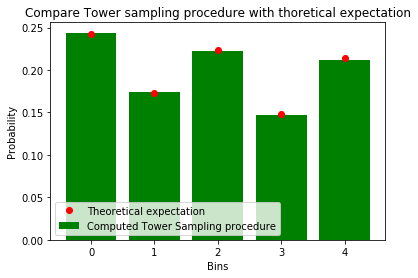

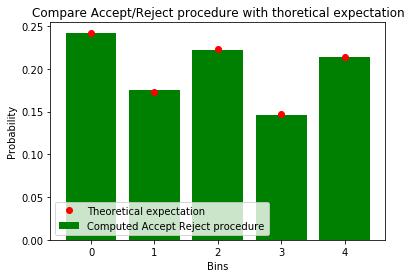

In [68]:
# Here is the code to plot histograms to compare the theoretical distribution
# with our results.

N_point = 100000
d_tower = []
d_accept = []
list_prob_plot = []
x_hist = []
for i in range(N_point):
    d_tower.insert(i, tower_sampling(N_item, list_prob, list_cumulants) - 1)
    d_accept.insert(i, accept_reject(height,N_item, list_prob))

#X Axes vector    
for i in range(N_item):
    x_hist.append(i)
    
# To plot accept/reject.
d_accept.sort()
counter_accept=collections.Counter(d_accept)
counter_accept_val = counter_accept.values()
counter_accept_val = [x / N_point for x in counter_accept_val]

# To plot tower.
d_tower.sort()
counter_tower=collections.Counter(d_tower)
counter_tower_val = counter_tower.values()
counter_tower_val = [x / N_point for x in counter_tower_val]

# To compare Tower Sampling with theoretical 

plt.bar(x_hist, counter_tower_val, color='green', label='Computed Tower Sampling procedure')
plt.plot(list_prob, 'ro', label='Theoretical expectation')
plt.title('Compare Tower sampling procedure with thoretical expectation')
plt.xlabel('Bins')
plt.ylabel('Probability')
plt.legend()
plt.show()

# To compare Accept/Reject with theoretical 

plt.bar(x_hist, counter_accept_val, color='green', label='Computed Accept Reject procedure')
plt.plot(list_prob, 'ro',  label='Theoretical expectation')
plt.title('Compare Accept/Reject procedure with thoretical expectation')
plt.xlabel('Bins')
plt.ylabel('Probability')
plt.legend()
plt.show()


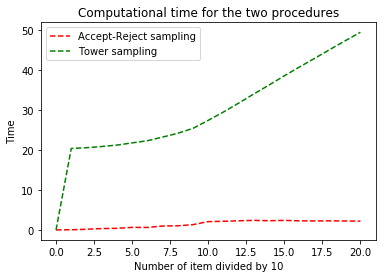

In [69]:
# Calculating computational time for both method. 
# The user can choose the number of loops.
# The user can choose the maximum number of items.

N_loop = 100000
N_item_max = 2000
N_ite = [0]
time_start_accept3 = []
time_start_tower3 = []
time_elapsed_accept3 = [0]
time_elapsed_tower3 = [0]
list_prob_time = []
list_random_time = []
list_cumulants_time = [0]
cumul_time= 0

for N_item_time in range(5,N_item_max, 100): 
    N_ite.append(N_item_max)
    
    for i in range(N_item_time):
        r_i = (random.random())**(-0.5) # SQUARE ROOT DISTRIBUTIOJN
        list_random_time.insert(i, r_i)
        norm += r_i

    
    list_prob_time = [x / norm for x in list_random_time]
    height_time = max(list_prob_time)

    for i in range(N_item_time):
        cumul_time += N_item*list_prob_time[i]
        list_cumulants_time.append(cumul_time)
    
    time_start_accept3.append(time.clock())
    
    for i in range(N_loop):

        accept_reject(height_time, N_item_time, list_prob_time)

    time_elapsed_accept3.append((time.clock() - time_start_accept3[int((N_item_time - 5)/100)]))


    time_start_tower.append(time.clock())


    for i in range(N_loop):

        tower_sampling(N_item_time, list_prob_time, list_cumulants_time)

    time_elapsed_tower3.append((time.clock() - time_start_tower[int((N_item_time - 5)/100)]))

    
plt.plot( time_elapsed_accept3, 'r--', label='Accept-Reject sampling' )
plt.plot( time_elapsed_tower3, 'g--', label='Tower sampling' )
plt.title('Computational time for the two procedures')
plt.xlabel('Number of item divided by 10')
plt.ylabel('Time')
plt.legend()
plt.show()

#############################
#########################################

COMPUTATIONAL TIME

Here the tool to plot the three accept/reject procedure computational time in the three different situations.

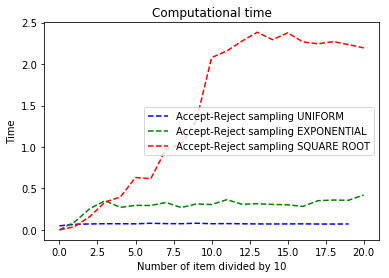

In [70]:

plt.plot( time_elapsed_accept, 'b--', label='Accept-Reject sampling UNIFORM' )
plt.plot( time_elapsed_accept2, 'g--', label='Accept-Reject sampling EXPONENTIAL' )
plt.plot( time_elapsed_accept3, 'r--', label='Accept-Reject sampling SQUARE ROOT' )
plt.title('Computational time')
plt.xlabel('Number of item divided by 10')
plt.ylabel('Time')
plt.legend()
plt.show()

COMPUTATIONAL TIME - THEORETICAL EXPECTATION

Here the tool to plot the three tower sampling procedure computational time in the three different situations and to compare it with the expected logaritmic behaviour.


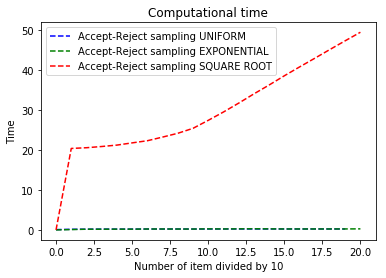

In [73]:

plt.plot( time_elapsed_tower, 'b--', label='Accept-Reject sampling UNIFORM' )
plt.plot( time_elapsed_tower2, 'g--', label='Accept-Reject sampling EXPONENTIAL' )
plt.plot( time_elapsed_tower3, 'r--', label='Accept-Reject sampling SQUARE ROOT' )
#plt.plot( logmy , 'ro', label='Theoretical expectation' )
plt.title('Computational time')
plt.xlabel('Number of item divided by 10')
plt.ylabel('Time')
plt.legend()
plt.show()